

---


<h1 align="center"> Dai Dati alla Conoscenza </h1>


---



**Moello CRISP-DM *(Cross Industry Standard 
Process for Data Mining)***

 \


- Definire gli obiettivi
  - studiare il dominio 
  - creare un piano di progetto
- Recuperare i dati
 - dati interni 
 - dati esterni
- Preparare i dati
 - pulizia dei dati
 - aggregazione dei dati
 - trasformazione dei dati
- Esplorare i dati
 - analisi univariata
 - analisi multivariata
 - corrrezioni
- Creare il modello
 - feature enginering
 - modellazione
 - test
 - validazione
- Presentare i risultati
 - daviz
 - resoconto

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



---
<h1 align="center"> STATISTICA DESCRITTIVA </h1>








---








\

È la parte della statistica che permette di analizzare e descrivere un fenomeno.

\

Obiettivi:
 - spiegare il funzionamento dei dati
 - trovare il modello statistico che comprende l' insieme di ipotesi migliori riguardanti la generazione di dati 




---


# **1. Definizioni di base**


---



- **Popolazione**: l'insieme degli elementi oggetto dell'indagine statistica
- **Campione**: un sottoinseime della popolazione sul quale viene effettuata la misurazione
- **Modalità**: è il valore numerico o l'attributo qualitativo con cui si caratterizza un campione.
- **Frequenza assoluta**: è il numero di volte che una determinata modalità si verifica nel campione di riferimento.
- **Frequenza relativa**: é il rapporto dato dalla frequenza e il  numero totale di elementi del campione.
- **Outlier**: anomalia nei dati. Può derivare da un errore di registrazione oppure da un evento anomalo reale.


In [10]:

# ================================================================
# poppolazione: nuclei familiari della città di Torino (anno 2021)
# ================================================================
fa = '/content/drive/MyDrive/Colab Notebooks/datasets/D2 Famiglie per numero componeneti e circoscrizione.csv'
ppl_fa = pd.read_csv(fa, sep=";").fillna(0)

# !!!!!!!!!!
# ATTENZINE!
# !!!!!!!!!!display(ppl_fa)

# Durante la conversione di un dataset se i campi sono vuoti 
# vengno convertiti in "NAN"(non a number). 
# Per evitare errori durante i calcoli, riempire i vuoiti con  "0". 
# ppl_fa = ppl_fa.fillna(0)
display(ppl_fa)



# ================================================================
# totale dei numclei familiari
# ================================================================
# .loc[] accede alle righe del DataFrame
# in questo caso prende solo i dati delle circoscrizioni 
crsc = ppl_fa.loc[: , ppl_fa.columns != "num_componenti"]

# display(crsc)
totf = np.sum(crsc.to_numpy())




# ===================================
# modalità: 2 componenti
# ===================================
mod_2c = ppl_fa["num_componenti"] == 2




# ===================================
# campione: famiglia con 2 componenti
# ===================================
cmp_2c = ppl_fa[mod_2c].loc[: , ppl_fa.columns != "num_componenti"].to_numpy()




# =================
# frequnza assoluta
# =================
freq_abs_2c = np.sum(cmp_2c)



# =================
# frequnza relativa
# =================
freq_rlt_2c = freq_abs_2c / totf

# 




,num_componenti,circ_1,circ_2,circ_3,circ_4,circ_5,circ_6,circ_7,circ_8
0,1,27328.0,30092.0,31189.0,24363.0,24874.0,21626,23649.0,32860.0
1,2,9731.0,19293.0,17125.0,13026.0,17010.0,13492,10577.0,17382.0
2,3,4870.0,10170.0,8861.0,6834.0,8894.0,7175,5404.0,8712.0
3,4,3244.0,6279.0,5515.0,4285.0,6057.0,4869,3499.0,5620.0
4,5,703.0,1254.0,1020.0,917.0,1472.0,1698,1017.0,1291.0
5,6,121.0,309.0,198.0,210.0,448.0,622,294.0,287.0
6,7,37.0,82.0,58.0,50.0,113.0,213,102.0,81.0
7,8,12.0,26.0,10.0,13.0,34.0,62,44.0,21.0
8,9,8.0,6.0,4.0,4.0,16.0,32,5.0,7.0
9,10,2.0,4.0,2.0,3.0,7.0,6,5.0,3.0




---
# **2. Tipologia delle rilevazioni statistiche**


---




- **Distribuzioni di frequenza**: indicano come i campioni della popolazione si distribuiscono rispetto alle modalità.


- **Serie storiche**: descrivono la dinamica di un certo fenomeno registrato in un perido definito.  


- **Serie territoriali**: descrivono un fenomeno in rapporto al territorio. 


- **Serie spazio-temporali**: sia storiche che territoriali.

- **Matrice di dati**: shematizzazione di informazioni in forma tabellare. Roccolgono campionature in rapporto alle misurazioni effettuate su uno i più fenomeni.

N.B Nel caso di una serie si può parlare di *serie univariate*, *bivariate* o *multivariate* a seconda che i fenomeni di indagine siano 1, 2 o molti. 





---


# **3.Misure Statistiche Elementari**


---




\begin{align}
differenza\ assoluta = x_2 - x_1
\end{align}





\



\begin{align}
differenza\ relativa = {x_2 - x_1 \over x_1} 
\end{align}

La differenza assoluta viene calcolata tra due modalità di un carattere quantitativo  $\mathrm{x}$. Soprattuto se espressa in percentuale, da un indicazione immediata della variazione del dato tra du


In [12]:
def diff_abs(x2: np.array, x1: np.array) -> np.array:
  return x2 - x1

def diff_rel(dabs: np.array, x1: np.array) -> np.array:
  return dabs / x1

In [13]:
# ========================================================================
# popolazione:  valori della produttività dei terreni agricoli per regione
# ========================================================================
path = "/content/drive/MyDrive/Colab Notebooks/datasets/Produttivita-dei-terreni-agricoli-per-regione.csv"


# !!!!!!!!!!!!
# Attenzione !
# !!!!!!!!!!!!
# I dataset possono contenere caratteri non compatibili con la codifica utf-8
ppl_pa = pd.read_csv(path, encoding='ISO-8859-1', sep=";").fillna(0)

cmp_pie = ppl_pa[ ppl_pa["Regione"] == "Piemonte" ]
display(cmp_pie)

pie_a_1995 = cmp_pie[cmp_pie["Anno"] == 1995]["Produttività in migliaia di euro"].to_numpy()
pie_a_1996 = cmp_pie[cmp_pie["Anno"] == 1996]["Produttività in migliaia di euro"].to_numpy()


# ===================
# differenza assoluta
# ===================
pie_da_95_96 = diff_abs(pie_a_1996, pie_a_1995)


# ===================
# differenza relativa
# ===================
pie_dr_95_96 = diff_rel(pie_da_95_96, pie_a_1995)

print("la produttività è variata del ",  pie_dr_95_96[0] * 100, "% tra il 1995 e il 1998")


,Anno,Regione,Produttività in migliaia di euro
0,1995,Piemonte,1.4324
20,1996,Piemonte,1.4704
40,1997,Piemonte,1.3570
60,1998,Piemonte,1.3662
80,1999,Piemonte,1.4720
100,2000,Piemonte,1.5106
120,2001,Piemonte,1.6142
140,2002,Piemonte,1.5292
160,2003,Piemonte,1.4395
180,2004,Piemonte,1.6504


la produttività è variata del  2.652890254118964 % tra il 1995 e il 1998


# **4.Indici di Posizione**

Gli indici di posizione individuano il voalore attorno al quale i dati della di una distribuzione cadono con frequenza maggiore.

**4.1 Media**




 - **media aritmetica:** misura la tendenza centrale di una distribuzione

\begin{align}
        media \ aritmetica = \mu =  {x_1 + x_2 + ...+ x_n \over n}   = \sum_{i=1}^n {x_i \over n} = {1 \over n}\sum_{i=1}^n x_1
\end{align}


\

**pseudocodice**



```
m = 0
n = array.size
for x in array
  m += (x / n)
```



**python**

In [14]:
def media_aritmetica(data: np.array) -> float:
  n = data.size
  return sum(data) / data.size

**test**

In [15]:
assert media_aritmetica(np.array([1, 2, 3, 4])) == 2.5, f"errore di implementazione nella mediar aritmetica"

**visualizzazione**

In [ ]:

d = np.array([12, 34, 25, 23, 2, 5, 10, 12, 33, 45], np.float64)
ma = media_aritmetica(d)



plt.plot(np.arange(10), np.full(10, ma), color="red", label= "media: " + str(ma))
plt.scatter(np.arange(10), d, alpha = 0.7)

plt.legend()
plt.show()


\


 - **media geometrica:** misura la tendenza centrale di una distribuzione di dati che contengono informazioni derivate da una moltiplicazione.
> es. il tasso di variazione calcolato dai dati sulla produzione agricola





\begin{align}
        media \ geometrica = \mu =  \sqrt[n]{x_1 * x_2 * ...* x_n}   = \sqrt[n]{\prod_{i=1}^n {x_i}} 
\end{align}


\

**pseudocodice**



```
m = 1
n = array.size
for x in array
  m *= x
m = pow(m, 1 /array.size) 
```



**python**

In [18]:
def media_geometrica(data: np.array) -> float:
  n = data.size
  m = np.prod(data)
  return pow(m, 1 / n)

**test**

In [19]:
assert media_geometrica(np.array([3, 3, 3, 3, 3, 3])) == 3.0, f"errore di implementazione nella media geometrica"

**visualizzazione**

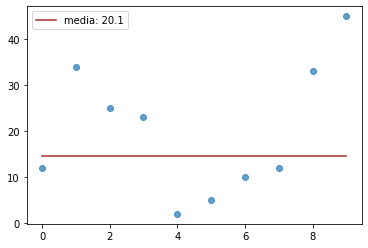

In [20]:
d = np.array([12, 34, 25, 23, 2, 5, 10, 12, 33, 45], np.float64)
mg = media_geometrica(d)

plt.plot(np.arange(10), np.full(10, mg), color="brown", label= "media: " + str(ma))
plt.scatter(np.arange(10), d, alpha = 0.7)

plt.legend()
plt.show()


**N.B**

Sebbene la media rappresenti un'indagine preliminare molto utile, è molto sensibile alla variazione dei vaolri e alle anomalie (*outlier*)



In [21]:
temperature = np.array([23, 25,29, 30, 62, 28, 27, 15, 28, 23])



\


**4.2 Posizione su un ordinamento**


- **quantile:** Il quantile  di ordine n o n-quantile (con n  preso nelll'intervallo 0-1 dei numeri reali) indica un valore al di sotto del quale si trova una certa percentuale di dati.

**python**

In [22]:
def quantile(data: np.array, n: float) -> float:
  assert n <= 1.0, "l'ordine del quantile deve essere un numero tra 0 e 1"
  index = int( n * float(data.size) )
  do = np.sort(data)
  return do[index]

def quantile_index(data: np.array, n: float) -> float:
  assert n <= 1.0, "l'ordine del quantile deve essere un numero tra 0 e 1"
  index = int( n * float(data.size) )
  do = np.sort(data)
  return index


**test**

In [25]:
d = np.array([12, 9, 34, 55, 17, 42, 25, 52, 55, 36])

# sorted: [9 12 17 25 34 36 42 52 55 55]
assert quantile(d, 0.1)  == 12
assert quantile(d, 0.25) == 17
assert quantile(d, 0.50) == 36
assert quantile(d, 0.75) == 52
assert quantile(d, 0.90) == 55

**visualizzazione**

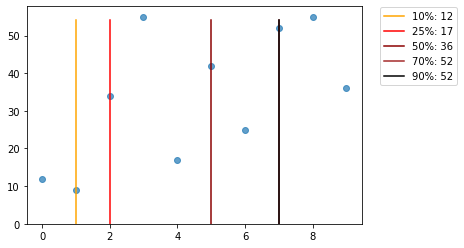

In [27]:

ds = np.sort(d)

d_max = ds[-1];

qx10  = np.full(d_max, quantile_index(ds, 0.1 ) );
qx25  = np.full(d_max, quantile_index(ds, 0.25) );
qx50  = np.full(d_max, quantile_index(ds, 0.50) );
qx75  = np.full(d_max, quantile_index(ds, 0.75) );
qx90  = np.full(d_max, quantile_index(ds, 0.90) );
qy    = np.arange(d_max)


plt.plot(qx10, qy , color="orange", label= "10%: " + str(quantile(ds, 0.1)) )
plt.plot(qx25, qy , color="red",   label= "25%: " + str(quantile(ds, 0.25)) )
plt.plot(qx50, qy , color="darkred", label= "50%: " + str(quantile(ds, 0.50)) )
plt.plot(qx75, qy , color="brown", label= "70%: " + str(quantile(ds, 0.75)) )
plt.plot(qx75, qy , color="black", label= "90%: " + str(quantile(ds, 0.75)) )

plt.scatter(np.arange(ds.size), d, alpha = 0.7)

plt.ylim(ymin=0)
plt.legend(bbox_to_anchor=(1.3, 1.02))
plt.show()


\

- **mediana:** è il valore centrale di una serie ordinata di dati. Rappresenta,quindi, il valore sotto il quale giace il 50% dei dati


**python**

In [28]:

# l'underscore é una convenzione di python per marcare una funzione
# o un metodo come "privato" all'interno del file o della classe

def _mediana_n_dispari(data: np.array) -> float:
  do = np.sort(data)
  return do[do.size // 2]

def _mediana_n_pari(data: np.array) -> float:
  do = np.sort(data)
  mp = data.size // 2 # esempio per n >= 6 e n < 8 -> mp = 3
  return ( do[mp - 1] + do[mp] ) / 2.0

def mediana(data: np.array) -> float:
  if (data.size % 2) == 0:
    return  _mediana_n_pari(data) 
  else:
    return  _mediana_n_dispari(data)

**test**

In [29]:
# pari
assert mediana(np.array([1, 2, 3, 4 ,5, 6])) == 3.5, "errore di implementazione nel calcolo della mediana"
# dispari
assert mediana(np.array([1, 2, 3, 4 ,5])) == 3.0, "errore di implementazione nel calcolo della mediana"
